<a href="https://colab.research.google.com/github/hamdanihamza/Handwritten-Digits-Recognition/blob/master/Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [100]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.utils import np_utils

# Downloading the Dataset

In [120]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

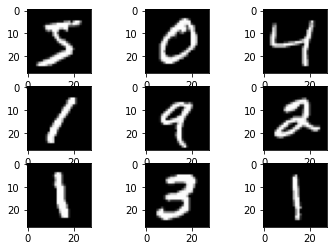

In [68]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

**The dataset contains 70k grayscaled images sized by 28x28<br>
Each image is a handwritten digit.**

In [121]:
print("Shape of Training Example : ",X_train.shape)
print("Shape of Testing Example : ",X_test.shape)
print("Number of Training Example : ",X_train.shape[0])
print("Number of Testing Example : ",X_test.shape[0])

Shape of Training Example :  (60000, 28, 28)
Shape of Testing Example :  (10000, 28, 28)
Number of Training Example :  60000
Number of Testing Example :  10000


**Reshape 28x28 image to 784 vector.**

In [122]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# Modeling

## 1. Neural Nets

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation#, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

**Training...**

In [131]:
model = Sequential()
model.add(Dense(units=64, input_shape=(784, )))
model.add(Activation("relu"))
model.add(Dense(units=64))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

# 20% on validation set
history = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.3)

Epoch 1/20
165/165 [==============================] - 1s 7ms/step - loss: 19.0487 - accuracy: 0.5633 - val_loss: 1.5459 - val_accuracy: 0.8299
Epoch 2/20
165/165 [==============================] - 1s 5ms/step - loss: 1.1714 - accuracy: 0.8564 - val_loss: 0.9532 - val_accuracy: 0.8647
Epoch 3/20
165/165 [==============================] - 1s 5ms/step - loss: 0.7089 - accuracy: 0.8890 - val_loss: 0.6889 - val_accuracy: 0.8911
Epoch 4/20
165/165 [==============================] - 1s 5ms/step - loss: 0.4820 - accuracy: 0.9098 - val_loss: 0.5920 - val_accuracy: 0.9006
Epoch 5/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3845 - accuracy: 0.9196 - val_loss: 0.5459 - val_accuracy: 0.9046
Epoch 6/20
165/165 [==============================] - 1s 5ms/step - loss: 0.3356 - accuracy: 0.9261 - val_loss: 0.4897 - val_accuracy: 0.9143
Epoch 7/20
165/165 [==============================] - 1s 5ms/step - loss: 0.2262 - accuracy: 0.9445 - val_loss: 0.4333 - val_accuracy: 0.9234
Epoch

**Model Evaluation.**

In [132]:
_, acc = model.evaluate(X_test, y_test)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.9462
> 94.620


**Make Prediction.**

In [133]:
prediction = model.predict(X_test)

Index of Test Image (0-9999) : 12


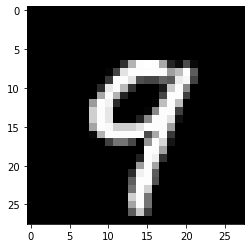

predicted value : 9


In [134]:
index = int(input("Index of Test Image (0-9999) : "))
plt.imshow(X_test[index].reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()
print("predicted value :",np.argmax(prediction[index]))